# 普通統計數據可視化圖表 for ALL questions’ results, including 受訪者人口調查part.

## Q1. 你多大程度同意「回收 對環保及可持續發展很重要」？ To what extent do you agree that "recycling is important for environmental protection and sustainable development?"

In [33]:
pip install pandas matplotlib openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


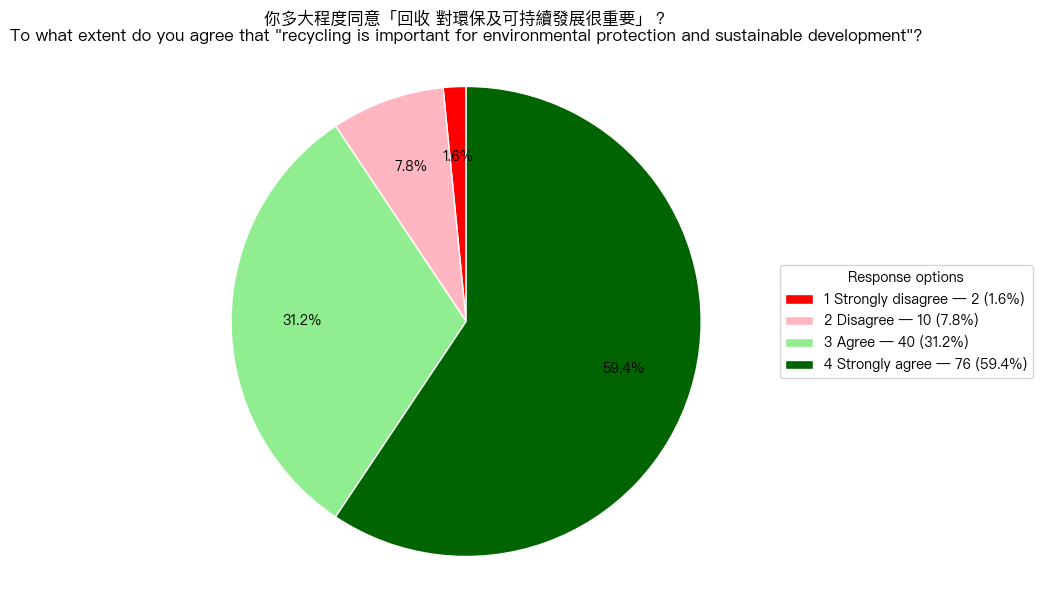

In [5]:
# ------------------------------------------------------------
# Pie chart of responses to:
# 「你多大程度同意『回收 對環保及可持續發展很重要』？」
# "To what extent do you agree that recycling is important for
#  environmental protection and sustainable development?"
#
# How to run:
#   Place this in a script or in 1.1.ipynb.
#   Ensure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   Run it; only the pie chart will display (white background).
# ------------------------------------------------------------

# --- install deps if missing (works in VS Code / Python scripts) ---
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# --- imports ---
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib

# --- config paths (relative to this notebook/script location) ---
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")

# --- load data ---
df = pd.read_excel(data_path, engine="openpyxl")

# --- find the column for this question ---
key_patterns = [
    r"recycling\s+is\s+important\s+for\s+environmental\s+protection\s+and\s+sustainable\s+development",
    r"你多大程度同意.*回收.*環保.*可持續發展.*重要",
]

def _find_question_column(columns):
    joined = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in joined:
        if re.search(key_patterns[0], norm, flags=re.IGNORECASE):
            return c
    for c, norm in joined:
        if re.search(key_patterns[1], norm):
            return c
    for c, norm in joined:
        if re.search(r"recycling", norm, flags=re.IGNORECASE) and re.search(r"sustain", norm, flags=re.IGNORECASE):
            return c
    return None

col = _find_question_column(df.columns)
if col is None:
    raise RuntimeError("Could not find the survey column automatically. Please set `col` to the exact header.")

# --- clean & map responses ---
series = df[col].dropna()

text_to_num = {
    "strongly disagree": 1, "非常不同意": 1, "1": 1, 1: 1,
    "disagree": 2, "不同意": 2, "2": 2, 2: 2,
    "agree": 3, "同意": 3, "3": 3, 3: 3,
    "strongly agree": 4, "非常同意": 4, "4": 4, 4: 4,
}
def to_num(v):
    s = str(v).strip().lower()
    return text_to_num.get(v, text_to_num.get(s))

nums = series.map(to_num).dropna().astype(int)

label_map = {
    1: "1 Strongly disagree",
    2: "2 Disagree",
    3: "3 Agree",
    4: "4 Strongly agree",
}

counts = nums.value_counts().reindex([1, 2, 3, 4], fill_value=0)
labels = [label_map[i] for i in [1, 2, 3, 4]]

# --- font (Chinese capable if available) ---
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# --- plotting (white background, clear, no overlaps) ---
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")

total = counts.sum()
pct = (counts / total * 100).round(1) if total > 0 else counts.astype(float)

# NOTE: pie() returns THREE values when autopct is used.
# 在 pie() 這裡加上 colors
palette = ["#FF0000", "#FFB6C1", "#90EE90", "#006400"]  # 4 個選項各一色
wedges, texts, autotexts = ax.pie(
    counts.values,
    startangle=90,
    colors=palette,              # ← 這裡
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.7,
    wedgeprops=dict(edgecolor="white"),
)


# Build legend on the right with counts and percentages
legend_labels = [
    f"{labels[i]} — {int(counts.values[i])}" + (f" ({pct.values[i]}%)" if total > 0 else "")
    for i in range(len(labels))
]
ax.legend(
    wedges, legend_labels,
    title="Response options",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_cn = "你多大程度同意「回收 對環保及可持續發展很重要」？"
title_en = 'To what extent do you agree that "recycling is important for environmental protection and sustainable development"?'
ax.set_title(title_cn + "\n" + title_en, pad=16)

ax.axis("equal")
plt.tight_layout()
plt.show()


## Q2. 你認爲自己對本地回收的了解程度屬於哪一水平？ How would you rate your level of knowledge about recycling?

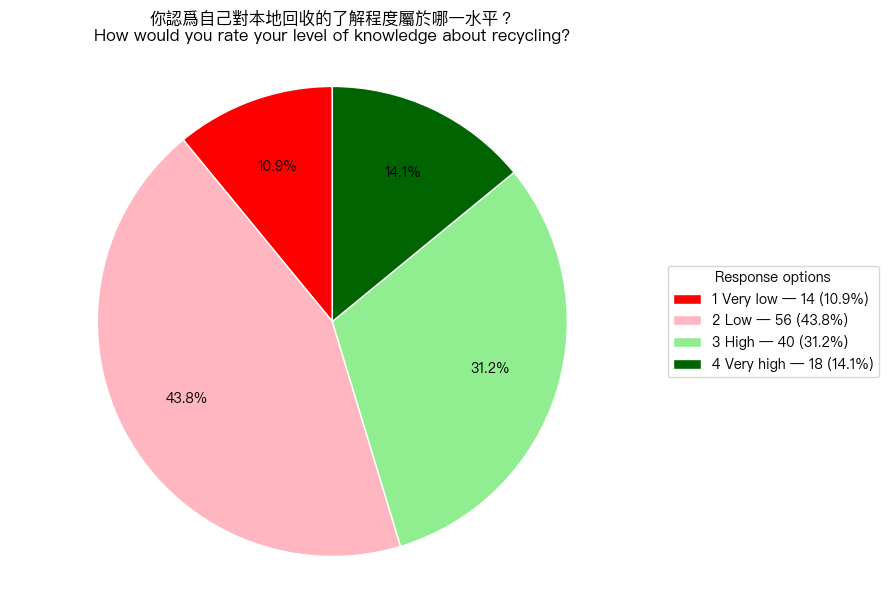

In [6]:
# ------------------------------------------------------------
# Pie chart of responses to:
# 「你認爲自己對本地回收的了解程度屬於哪一水平？」
# "How would you rate your level of knowledge about recycling?"
#
# How to run:
#   Put this in a cell of 1.1.ipynb (or any .py script).
#   Ensure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   Run it; only the pie chart will display (white background).
# ------------------------------------------------------------

# --- install deps if missing (works in VS Code / Python scripts) ---
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# --- imports ---
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib

# --- config paths (relative to this notebook/script location) ---
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")

# --- load data ---
df = pd.read_excel(data_path, engine="openpyxl")

# --- find the column for this question (Chinese or English header) ---
key_patterns = [
    r"how\s+would\s+you\s+rate\s+your\s+level\s+of\s+knowledge\s+about\s+recycling",
    r"你認爲?自己對本地回收的了解程度屬於哪一水平",
    r"對本地回收.*了解程度",
]

def _find_question_column(columns):
    joined = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in joined:
        if re.search(key_patterns[0], norm, flags=re.IGNORECASE):
            return c
    for c, norm in joined:
        if any(re.search(p, norm) for p in key_patterns[1:]):
            return c
    # fallback: any column containing "knowledge" and "recycling"
    for c, norm in joined:
        if re.search(r"knowledge", norm, flags=re.IGNORECASE) and re.search(r"recycling", norm, flags=re.IGNORECASE):
            return c
    return None

col = _find_question_column(df.columns)
if col is None:
    raise RuntimeError("Could not find the survey column automatically. Please set `col` to the exact header.")

# --- clean & map responses ---
series = df[col].dropna()

# Accept numeric 1-4 or common text equivalents in EN/ZH
text_to_num = {
    # 1 Very low
    "very low": 1, "1": 1, 1: 1, "非常低": 1, "很低": 1, "極低": 1, "低（很低）": 1,
    # 2 Low
    "low": 2, "2": 2, 2: 2, "低": 2, "較低": 2,
    # 3 High
    "high": 3, "3": 3, 3: 3, "高": 3, "較高": 3,
    # 4 Very high
    "very high": 4, "4": 4, 4: 4, "非常高": 4, "很高": 4, "極高": 4, "高（很高）": 4,
}
def to_num(v):
    s = str(v).strip().lower()
    return text_to_num.get(v, text_to_num.get(s))

nums = series.map(to_num).dropna().astype(int)

# Final label mapping (complete the missing content, e.g., 3 -> "3 High")
label_map = {
    1: "1 Very low",
    2: "2 Low",
    3: "3 High",
    4: "4 Very high",
}

counts = nums.value_counts().reindex([1, 2, 3, 4], fill_value=0)
labels = [label_map[i] for i in [1, 2, 3, 4]]

# --- font (Chinese-capable if available) ---
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# --- plotting (white background, clear, no overlaps) ---
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")

total = counts.sum()
pct = (counts / total * 100).round(1) if total > 0 else counts.astype(float)

# 在 pie() 這裡加上 colors
palette = ["#FF0000", "#FFB6C1", "#90EE90", "#006400"]  # 4 個選項各一色
wedges, texts, autotexts = ax.pie(
    counts.values,
    startangle=90,
    colors=palette,              # ← 這裡
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.7,
    wedgeprops=dict(edgecolor="white"),
)

# Legend on the right with counts + percentages for readability
legend_labels = [
    f"{labels[i]} — {int(counts.values[i])}" + (f" ({pct.values[i]}%)" if total > 0 else "")
    for i in range(len(labels))
]
ax.legend(
    wedges, legend_labels,
    title="Response options",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_cn = "你認爲自己對本地回收的了解程度屬於哪一水平？"
title_en = "How would you rate your level of knowledge about recycling?"
ax.set_title(title_cn + "\n" + title_en, pad=16)

ax.axis("equal")  # keep circle shape
plt.tight_layout()
plt.show()


## Q3. 請指出下列哪些物品可以在「綠在區區」設施進行回收。 Identify which of the following item(s) can be recycled at Green@Community facilities. 

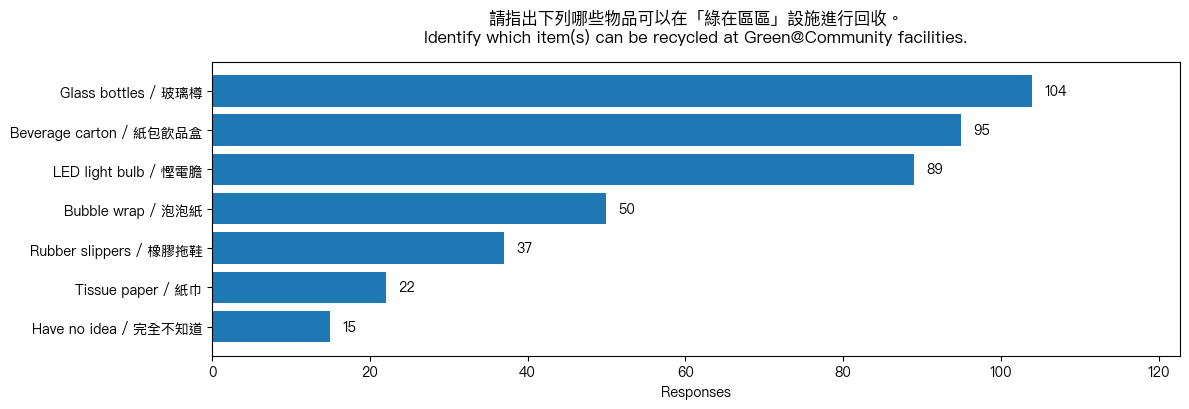

In [7]:
# ------------------------------------------------------------
# Visualization (best chart type: Horizontal Bar)
# 問題 / Question:
# 「請指出下列哪些物品可以在『綠在區區』設施進行回收。」
# "Identify which of the following item(s) can be recycled at Green@Community facilities."
#
# How to run (VS Code or 1.1.ipynb):
#   - Make sure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   - Run this cell / script. It displays ONE chart (white background). Nothing else prints.
# ------------------------------------------------------------

# --- install deps if missing (works in VS Code / Python scripts) ---
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# --- imports ---
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap
from collections import defaultdict, Counter

# --- load data ---
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ------------------------ EXACT OPTIONS FOR THIS QUESTION ------------------------
# From the provided question screenshot, the checkbox options are:
# 1) 紙包飲品盒  Beverage carton
# 2) 泡泡紙      Bubble wrap
# 3) 玻璃樽      Glass bottles
# 4) 慳電膽      LED light bulb
# 5) 橡膠拖鞋    Rubber slippers
# 6) 紙巾        Tissue paper
# 7) 完全不知道  Have no idea

items_patterns = {
    "Beverage carton / 紙包飲品盒": [r"紙包飲品|紙包飲品盒|beverage\s*carton|tetra"],
    "Bubble wrap / 泡泡紙":        [r"泡泡紙|bubble\s*wrap"],
    "Glass bottles / 玻璃樽":       [r"玻璃樽|glass\s*bottles?"],
    "LED light bulb / 慳電膽":      [r"慳電膽|led\s*light\s*bulb|led\s*bulb"],
    "Rubber slippers / 橡膠拖鞋":   [r"橡膠拖鞋|rubber\s*slippers?"],
    "Tissue paper / 紙巾":          [r"紙巾(?!紙包)|tissue\s*paper"],
    "Have no idea / 完全不知道":     [r"完全不知道|have\s*no\s*idea"],
}

# Helper: does a header match any pattern list?
def header_matches(header: str, pats) -> bool:
    h = str(header)
    return any(re.search(p, h, flags=re.IGNORECASE) for p in pats)

# Helper: checkbox-ish truthy
def truthy(v) -> bool:
    if pd.isna(v): return False
    s = str(v).strip().lower()
    return s in {"true","yes","y","1","checked","selected","tick","✓","✔","是","有","可以","可","on"} or v is True or v == 1

# ------------------------ STRATEGY 1: one-checkbox-per-item columns ------------------------
label_to_cols = defaultdict(list)
for col in df.columns:
    # ignore obvious next-question stems with '?'
    if "?" in str(col): 
        continue
    for label, pats in items_patterns.items():
        if header_matches(col, pats):
            label_to_cols[label].append(col)

# Count selections if we found any columns
counts = {}
for label, cols in label_to_cols.items():
    n = 0
    for c in cols:
        ser = df[c]
        # first try boolean-like ticks
        n_part = int(ser.map(truthy).sum())
        # fallback: non-empty cells
        if n_part == 0:
            n_part = int(ser.astype(str).str.strip().replace({"nan":"", "None":""}).ne("").sum())
        n += n_part
    if n > 0:
        counts[label] = n

# ------------------------ STRATEGY 2: a single multi-select column ------------------------
def parse_multiselect_column(col: pd.Series) -> dict:
    bag = Counter()
    ser = col.dropna().astype(str)
    for cell in ser:
        # split on common delimiters (Chinese and English)
        parts = [p.strip() for p in re.split(r"[;,/、，\|]| and | & |\s{2,}|\n|\r", cell) if p.strip()]
        for p in parts:
            low = p.lower()
            for label, pats in items_patterns.items():
                if any(re.search(pp, low) for pp in pats):
                    bag[label] += 1
                    break
    return dict(bag)

if not counts:
    # Look for a stem column that likely stores multi-select answers in one cell
    stem_regex = r"identify\s+which.*recycl.*green@community|請指出下列哪些物品可以在.*綠在區區.*回收"
    multi_cols = [c for c in df.columns if re.search(stem_regex, str(c), flags=re.IGNORECASE)]
    # If none found, just scan all columns for multi-select style
    multi_cols = multi_cols or list(df.columns)
    bag = Counter()
    for c in multi_cols:
        parsed = parse_multiselect_column(df[c])
        for k, v in parsed.items():
            bag[k] += v
    counts = {k: int(v) for k, v in bag.items() if v > 0}

# If still nothing, raise a clear error (so the cell fails rather than printing)
if not counts:
    raise RuntimeError("No selections detected for the Green@Community items. Please verify the headers or response format.")

# ------------------------ PREPARE SERIES FOR PLOTTING ------------------------
s = pd.Series(counts, dtype="int64").sort_values(ascending=True)

# ------------------------ PLOT (HORIZONTAL BAR = clearest for many items) ------------------------
# Chinese-capable font (best effort)
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# Wrap long labels to avoid overlap
wrapped_index = ["\n".join(wrap(idx, width=28)) for idx in s.index]

fig_h = max(4, 0.6 * len(s))
fig, ax = plt.subplots(figsize=(12, fig_h), facecolor="white")
ax.set_facecolor("white")

ax.barh(wrapped_index, s.values)

ax.set_xlabel("Responses")
title_cn = "請指出下列哪些物品可以在「綠在區區」設施進行回收。"
title_en = "Identify which item(s) can be recycled at Green@Community facilities."
ax.set_title(title_cn + "\n" + title_en, pad=14)

# Value labels at bar ends (no overlap)
max_v = int(s.values.max())
for y, v in enumerate(s.values):
    ax.text(v + max(1, max_v * 0.015), y, str(int(v)), va="center")

# Layout tweaks to ensure clarity and avoid covering content
ax.margins(x=0.18)
plt.tight_layout()
plt.show()


## Q4. 在最近12個月内，你有否使用過「綠在區區」回收設施？ In the past 12 months, have you used any Green@Community recycling facility?

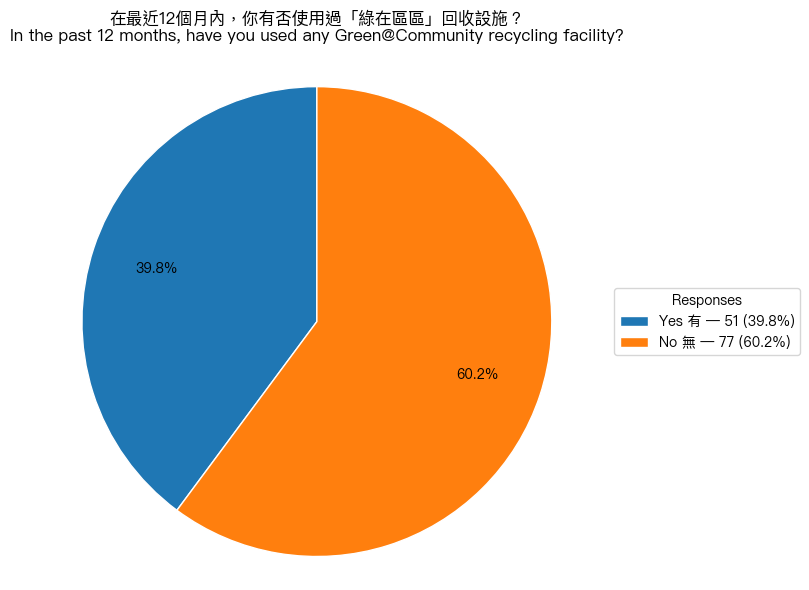

In [8]:
# ------------------------------------------------------------
# Visualization (best fit: Pie chart, white background)
# 問題 / Question:
# 「在最近12個月內，你有否使用過『綠在區區』回收設施？」
# "In the past 12 months, have you used any Green@Community recycling facility?"
#
# How to run in 1.1.ipynb or VS Code:
#   - Ensure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   - Run this cell / script. It displays ONE chart and prints nothing else.
# ------------------------------------------------------------

# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- find the column for this question ----------
# Match either English or Chinese wording (robust to spacing)
patterns = [
    r"in the past\s*12\s*months.*have you used.*green@community.*facility",
    r"在最近\s*12\s*個?月內?.*你有否使用過.*綠在區區.*回收設施",
]
def find_col(columns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    # fallback: headers containing both "Green@Community" & "12 months"
    for c, norm in cols:
        if re.search(r"green@community", norm, flags=re.IGNORECASE) and re.search(r"12", norm):
            return c
    return None

col = find_col(df.columns)
if col is None:
    raise RuntimeError("Could not find the survey column for the 12-month usage question.")

# ---------- clean & map responses to Yes/No ----------
series = df[col].dropna()

map_yesno = {
    # Yes
    "yes": "Yes 有", "y": "Yes 有", "1": "Yes 有", "true": "Yes 有",
    "有": "Yes 有", "是": "Yes 有",
    # No
    "no": "No 無", "n": "No 無", "0": "No 無", "false": "No 無",
    "無": "No 無", "没有": "No 無", "否": "No 無",
}

def to_label(v):
    s = str(v).strip().lower()
    return map_yesno.get(s)

labels_series = series.map(to_label).dropna()
counts = labels_series.value_counts().reindex(["Yes 有", "No 無"], fill_value=0)

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- plot (pie with legend to avoid overlap) ----------
fig, ax = plt.subplots(figsize=(8, 6), facecolor="white")
ax.set_facecolor("white")

total = counts.sum()
wedges, texts, autotexts = ax.pie(
    counts.values,
    startangle=90,
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.72,
    wedgeprops=dict(edgecolor="white"),
)

legend_labels = [f"{['Yes 有','No 無'][i]} — {int(counts.values[i])} ({(counts.values[i]/total*100 if total else 0):.1f}%)"
                 for i in range(len(counts))]
ax.legend(
    wedges, legend_labels,
    title="Responses",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_cn = "在最近12個月內，你有否使用過「綠在區區」回收設施？"
title_en = "In the past 12 months, have you used any Green@Community recycling facility?"
ax.set_title(title_cn + "\n" + title_en, pad=16)
ax.axis("equal")
plt.tight_layout()
plt.show()


## Q5. 你認為「綠在區區」提升公眾環保意識的成效如何？ How effective do you perceive the Green@Community to be in raising public environmental awareness?

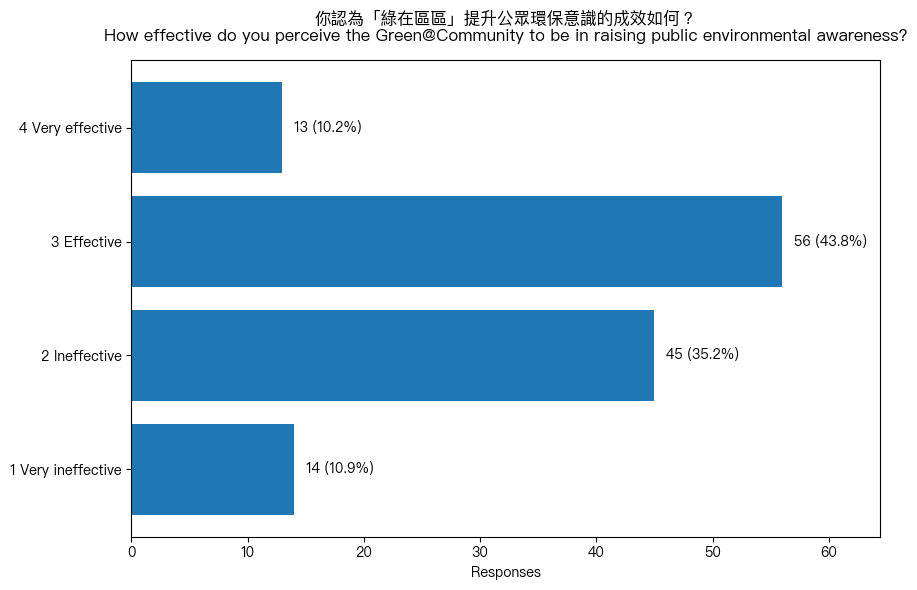

In [9]:
# ------------------------------------------------------------
# Visualization (best fit: Horizontal Bar, white background)
# 問題 / Question:
# 「你認為『綠在區區』提升公眾環保意識的成效如何？」
# "How effective do you perceive the Green@Community to be in raising public environmental awareness?"
#
# How to run in 1.1.ipynb or VS Code:
#   - Ensure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   - Run this cell / script. It displays ONE chart and prints nothing else.
# ------------------------------------------------------------

# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- find the column for this question ----------
patterns = [
    r"how\s+effective\s+do\s+you\s+perceive\s+the\s+green@community\s+to\s+be\s+in\s+raising\s+public\s+environmental\s+awareness",
    r"你認為.*綠在區區.*提升.*公眾.*環保.*意識.*成效.*如何",
]
def find_col(columns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    # fallback: contains "Green@Community" + "effective"
    for c, norm in cols:
        if re.search(r"green@community", norm, flags=re.IGNORECASE) and re.search(r"effective", norm, flags=re.IGNORECASE):
            return c
    return None

col = find_col(df.columns)
if col is None:
    raise RuntimeError("Could not find the survey column for the effectiveness question.")

# ---------- clean & map responses (Likert 1-4) ----------
series = df[col].dropna()

text_to_num = {
    # 1 Very ineffective
    "very ineffective": 1, "非常無效": 1, "極不有效": 1, "1": 1, 1: 1,
    # 2 Ineffective
    "ineffective": 2, "無效": 2, "較無效": 2, "2": 2, 2: 2,
    # 3 Effective
    "effective": 3, "有效": 3, "較有效": 3, "3": 3, 3: 3,
    # 4 Very effective
    "very effective": 4, "非常有效": 4, "極有效": 4, "4": 4, 4: 4,
}
def to_num(v):
    s = str(v).strip().lower()
    return text_to_num.get(v, text_to_num.get(s))

nums = series.map(to_num).dropna().astype(int)

label_map = {
    1: "1 Very ineffective",
    2: "2 Ineffective",
    3: "3 Effective",
    4: "4 Very effective",
}

counts = nums.value_counts().reindex([1, 2, 3, 4], fill_value=0)
perc = (counts / counts.sum() * 100).round(1) if counts.sum() > 0 else counts.astype(float)
labels = [label_map[i] for i in [1, 2, 3, 4]]

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- plot (clear horizontal bar; values shown; white background) ----------
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")

ax.barh(labels, counts.values)

# add count + % labels to the right of bars
max_v = int(counts.max()) if counts.sum() > 0 else 1
for y, (v, p) in enumerate(zip(counts.values, perc.values)):
    ax.text(v + max(1, int(max_v * 0.02)), y, f"{int(v)} ({p:.1f}%)", va="center")

ax.set_xlabel("Responses")
title_cn = "你認為「綠在區區」提升公眾環保意識的成效如何？"
title_en = "How effective do you perceive the Green@Community to be in raising public environmental awareness?"
ax.set_title(title_cn + "\n" + title_en, pad=14)

ax.margins(x=0.15)
plt.tight_layout()
plt.show()
